In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
df = pd.read_csv("stores_sales_forecasting.csv", encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['day'] = df['Order Date'].dt.day
df['day_of_week'] = df['Order Date'].dt.dayofweek
df['month'] = df['Order Date'].dt.month
df['year'] = df['Order Date'].dt.year

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,day,day_of_week,month,year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,8,1,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,8,1,11,2016
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,11,6,10,2015
3,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,9,0,6,2014
4,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,9,0,6,2014


In [6]:
categorical_columns = [
    "Ship Mode", "Segment", "Country", "City",
    "State", "Region", "Category", "Sub-Category"
]

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df.head()


,Row ID,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Postal Code,Product ID,Product Name,Sales,...,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Region_East,Region_South,Region_West,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables
0,1,CA-2016-152156,2016-11-08,2016-11-11,CG-12520,Claire Gute,42420,FUR-BO-10001798,Bush Somerset Collection Bookcase,261.9600,...,False,False,False,False,False,True,False,False,False,False
1,2,CA-2016-152156,2016-11-08,2016-11-11,CG-12520,Claire Gute,42420,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,...,False,False,False,False,False,True,False,True,False,False
2,4,US-2015-108966,2015-10-11,2015-10-18,SO-20335,Sean O'Donnell,33311,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,957.5775,...,False,False,False,False,False,True,False,False,False,True
3,6,CA-2014-115812,2014-06-09,2014-06-14,BH-11710,Brosina Hoffman,90032,FUR-FU-10001487,Eldon Expressions Wood and Plastic Desk Access...,48.8600,...,False,False,False,False,False,False,True,False,True,False
4,11,CA-2014-115812,2014-06-09,2014-06-14,BH-11710,Brosina Hoffman,90032,FUR-TA-10001539,Chromcraft Rectangular Conference Tables,1706.1840,...,False,False,False,False,False,False,True,False,False,True


In [8]:
X = df.drop(columns=[
    "Row ID", "Order ID", "Order Date", "Ship Date",
    "Customer ID", "Customer Name", "Product ID",
    "Product Name", "Quantity"   # target
])

y = df["Quantity"]

X.head(), y.head()

(   Postal Code      Sales  Discount    Profit  day  day_of_week  month  year  \
 0        42420   261.9600      0.00   41.9136    8            1     11  2016   
 1        42420   731.9400      0.00  219.5820    8            1     11  2016   
 2        33311   957.5775      0.45 -383.0310   11            6     10  2015   
 3        90032    48.8600      0.00   14.1694    9            0      6  2014   
 4        90032  1706.1840      0.20   85.3092    9            0      6  2014   
 
    Ship Mode_Same Day  Ship Mode_Second Class  ...  State_Washington  \
 0               False                    True  ...             False   
 1               False                    True  ...             False   
 2               False                   False  ...             False   
 3               False                   False  ...             False   
 4               False                   False  ...             False   
 
    State_West Virginia  State_Wisconsin  State_Wyoming  Region_East  \


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    random_state=42
)

model.fit(X_train, y_train)
print("Model training completed.")

Model training completed.


In [11]:
preds = model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("MAE (Mean Absolute Error):", mae)
print("RMSE (Root Mean Squared Error):", rmse)

MAE (Mean Absolute Error): 1.462810020824237
RMSE (Root Mean Squared Error): 2.002142686448611


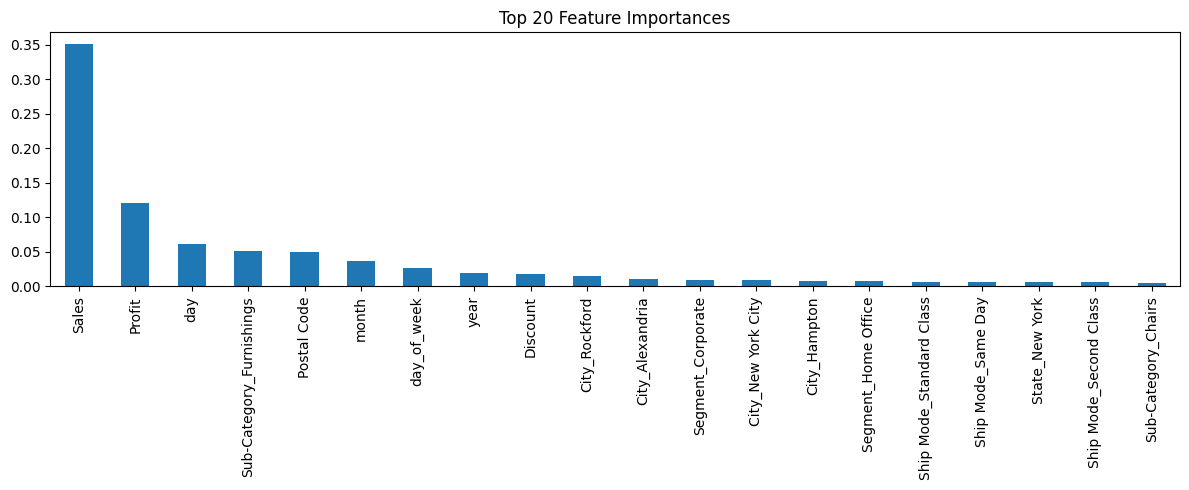

In [12]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(20).plot(kind="bar", figsize=(12,5))

plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()

In [14]:
sample = X_test.iloc[0:1]
prediction = model.predict(sample)[0]

print("Sample Input:")
display(sample)

print("\nPredicted Quantity:", prediction)

Sample Input:


,Postal Code,Sales,Discount,Profit,day,day_of_week,month,year,Ship Mode_Same Day,Ship Mode_Second Class,...,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Region_East,Region_South,Region_West,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables
1845,90712,94.2,0.0,39.564,30,3,3,2017,False,True,...,False,False,False,False,False,False,True,False,True,False



Predicted Quantity: 5.08211657241013
